In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale


In [43]:
df=pd.read_csv("KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [44]:
x=pd.get_dummies(df,columns=['gender'])
x.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_F,gender_M
0,708746,916,103916,30-34,15,7350,1,1.43,2,1,0,1
1,708749,916,103917,30-34,16,17861,2,1.82,2,0,0,1
2,708771,916,103920,30-34,20,693,0,0.00,1,0,0,1
3,708815,916,103928,30-34,28,4259,1,1.25,1,0,0,1
4,708818,916,103928,30-34,28,4133,1,1.29,1,1,0,1


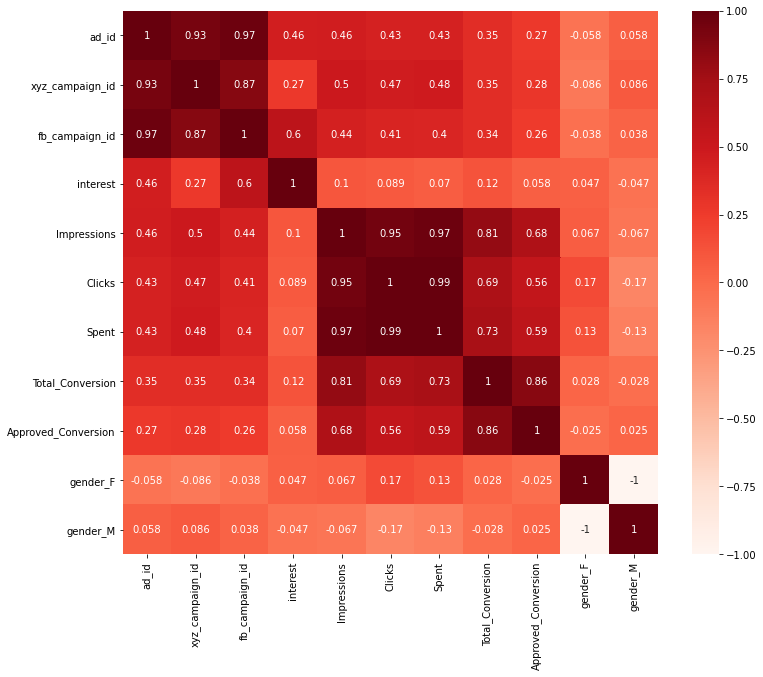

In [45]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

dropping the first four columns in our dataset becase as we can see that the they have lower correlation to the target variable,hence they have no use to our model

In [46]:
x=x.drop(['ad_id','xyz_campaign_id','fb_campaign_id','age'],axis=1)

In [47]:
x

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,gender_F,gender_M
0,15,7350,1,1.430000,2,1,0,1
1,16,17861,2,1.820000,2,0,0,1
2,20,693,0,0.000000,1,0,0,1
3,28,4259,1,1.250000,1,0,0,1
4,28,4133,1,1.290000,1,1,0,1
...,...,...,...,...,...,...,...,...
1138,109,1129773,252,358.189997,13,2,1,0
1139,110,637549,120,173.880003,3,0,1,0
1140,111,151531,28,40.289999,2,0,1,0
1141,113,790253,135,198.710000,8,2,1,0


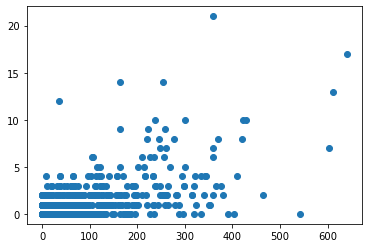

In [48]:
plt.scatter(x.Spent,x.Approved_Conversion)

# KMEANS CLUSTERING

C:\Users\26377\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



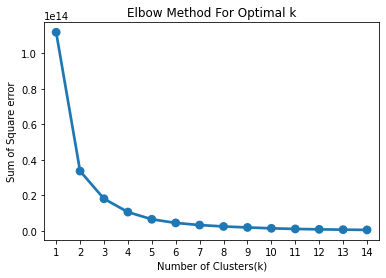

In [54]:
from sklearn.cluster import KMeans
import seaborn as sns 

SSE = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(x)
    SSE[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square error')
plt.title('Elbow Method For Optimal k')
plt.show()

as we can see the best number of clusters to implement is from the elbow method

In [50]:

#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
y_means=KMean_clust.fit_predict(x)
y_means

array([0, 0, 0, ..., 0, 1, 1])

In [56]:
#Find the clusters for the observation given in the dataset
df['Advert_Type'] = y_means
df.drop(['Cluster'],axis=1,inplace=True)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0


In [74]:
#Here, we see there are 3 different ad campaigns for xyz company.

#Now we'll replace their names with campaign_a, campaign_b and campaign_c for better visualisation which creates problem with integer values

df["xyz_campaign_id"].replace({916:"campaign_a",936:"campaign_b",1178:"campaign_c"}, inplace=True)

In [75]:
d=dtale.show(df)
d

In [73]:
df.tail(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
1133,1314405,campaign_c,179972,45-49,F,104,558666,110,162.639998,14,5,1
1134,1314406,campaign_c,179973,45-49,F,105,1118200,235,333.749994,11,4,2
1135,1314407,campaign_c,179974,45-49,F,106,107100,23,33.710001,1,0,0
1136,1314408,campaign_c,179975,45-49,F,107,877769,160,232.590001,13,4,2
1137,1314409,campaign_c,179976,45-49,F,108,212508,33,47.690000,4,1,0
1138,1314410,campaign_c,179977,45-49,F,109,1129773,252,358.189997,13,2,2
1139,1314411,campaign_c,179978,45-49,F,110,637549,120,173.880003,3,0,1
1140,1314412,campaign_c,179979,45-49,F,111,151531,28,40.289999,2,0,0
1141,1314414,campaign_c,179981,45-49,F,113,790253,135,198.710000,8,2,1
1142,1314415,campaign_c,179982,45-49,F,114,513161,114,165.609999,5,2,1


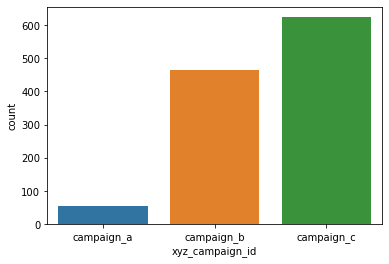

In [76]:
# count plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = df) 
# Show the plot 
plt.show() 

This shows campaign_c has most number of ads.

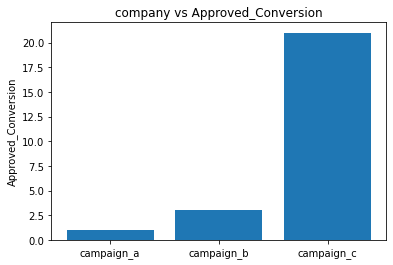

In [77]:
#Approved_Conversion
# Creating our bar plot
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved_Conversion")
plt.title("company vs Approved_Conversion")
plt.show()

It's clear from both the above graphs that compaign_c has better Approved_conversion count, i.e. most people bought products in campaign_c.

age distrubution

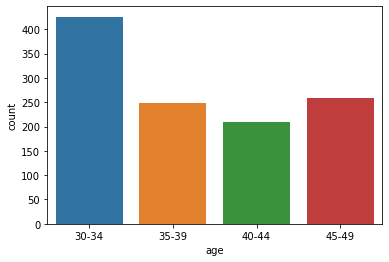

In [78]:
# count plot on single categorical variable 
sns.countplot(x ='age', data = df) 
# Show the plot 
plt.show() 

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

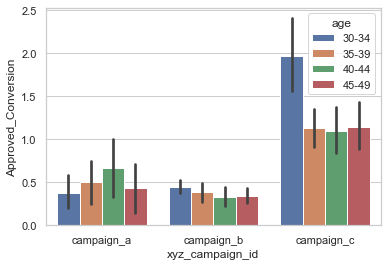

In [79]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=tips)

It's interesting to note that in campaign_c and campaign_b, the age group of 30-34 shows more interest, whereas in campaign_a the age group of 40-44 shows more interest.

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

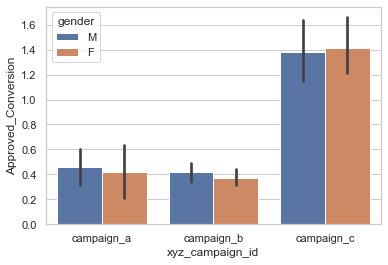

In [80]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"], data=tips)

Both the genders shows similar interests in all three campaigns. and their are not biased in terms of their ad spending it is gender neutral

In [82]:
from sklearn import*
metrics.silhouette_score(x, y_means, metric='euclidean')

0.7327037611967981

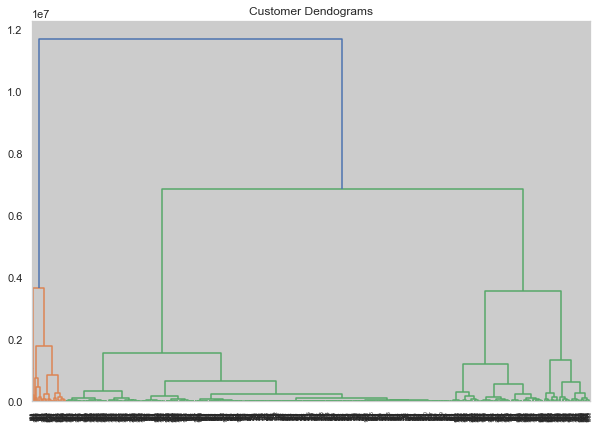

In [86]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))

In [89]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(x)

array([2, 2, 2, ..., 2, 1, 1], dtype=int64)

3 cluster seems to be perfoming well in both analysis